In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
# demonstration on randomly generated data
# https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-with-scipy-statsmodels-sklearn-da8e373cc89b

nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

# adding random noise
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [22]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  2.50000000e+01,
         1.00000000e+00],
       [ 4.08163265e-01,  3.96924149e-01,  2.10849646e+01,
         1.00000000e+00],
       [ 8.16326531e-01,  7.28634783e-01,  1.75031237e+01,
         1.00000000e+00],
       [ 1.22448980e+00,  9.40632785e-01,  1.42544773e+01,
         1.00000000e+00],
       [ 1.63265306e+00,  9.98087482e-01,  1.13390254e+01,
         1.00000000e+00],
       [ 2.04081633e+00,  8.91559230e-01,  8.75676801e+00,
         1.00000000e+00],
       [ 2.44897959e+00,  6.38550320e-01,  6.50770512e+00,
         1.00000000e+00],
       [ 2.85714286e+00,  2.80629400e-01,  4.59183673e+00,
         1.00000000e+00],
       [ 3.26530612e+00, -1.23398137e-01,  3.00916285e+00,
         1.00000000e+00],
       [ 3.67346939e+00, -5.07151709e-01,  1.75968347e+00,
         1.00000000e+00],
       [ 4.08163265e+00, -8.07581691e-01,  8.43398584e-01,
         1.00000000e+00],
       [ 4.48979592e+00, -9.75328286e-01,  2.60308205e-01,
      

In [12]:
y

array([ 3.98875801,  5.6141827 ,  5.48449424,  5.78926427,  5.658672  ,
        5.09367647,  6.54904409,  6.9107855 ,  7.34697108,  7.61610865,
        5.76351572,  6.80777856,  6.5039052 ,  7.03098669,  6.90797381,
        8.03738443,  8.78080143,  7.57806482,  8.28473311,  9.55350153,
        9.74363387, 10.05068819, 10.07987793,  9.86086752,  9.31492253,
        8.9422038 ,  9.96292754,  9.73276843,  9.1864018 ,  9.72397747,
        9.5486701 , 10.61885656, 10.29127505, 10.33084877, 11.65903965,
       10.07794763, 10.91294095, 10.56068958, 10.99752724, 10.40766961,
       10.04235456, 10.42150624,  9.59777358, 10.58248113, 10.0026053 ,
        9.73269684, 10.1237329 , 10.64917486, 10.28746761, 10.8899302 ])

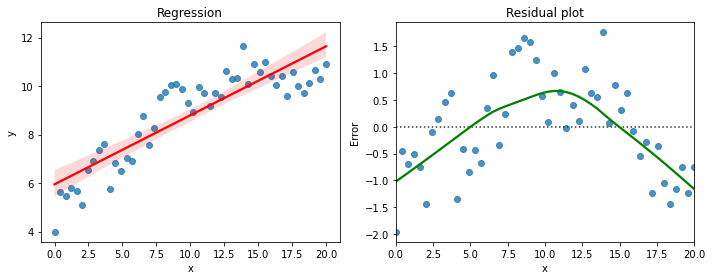

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.regplot(x=x,y=y,line_kws={'color':'red'})
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')
plt.subplot(1,2,2)
sns.residplot(x=x,y=y,lowess=True,line_kws={'color':'green'})
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Residual plot')
plt.tight_layout()

In [5]:
df = pd.DataFrame()
df['x']=x
df['y']=y

df['xy'] = df.x * df.y
df['x2'] = df.x**2
df['y2'] = df.y**2
df['x-x.avg**2'] = (df.x - df.x.mean())**2
df['y-y.avg**2'] = (df.y - df.y.mean())**2

In [6]:
df

x          y          xy          x2          y2  x-x.avg**2  \
0    0.000000   3.988758    0.000000    0.000000   15.910190  100.000000   
1    0.408163   5.614183    2.291503    0.166597   31.519047   92.003332   
2    0.816327   5.484494    4.477138    0.666389   30.079677   84.339858   
3    1.224490   5.789264    7.088895    1.499375   33.515581   77.009579   
4    1.632653   5.658672    9.238648    2.665556   32.020569   70.012495   
5    2.040816   5.093676   10.395258    4.164931   25.945540   63.348605   
6    2.448980   6.549044   16.038475    5.997501   42.889978   57.017909   
7    2.857143   6.910785   19.745101    8.163265   47.758956   51.020408   
8    3.265306   7.346971   23.990110   10.662224   53.977984   45.356102   
9    3.673469   7.616109   27.977542   13.494377   58.005111   40.024990   
10   4.081633   5.763516   23.524554   16.659725   33.218114   35.027072   
11   4.489796   6.807779   30.565536   20.158267   46.345849   30.362349   
12   4.897959   6.503905   31.855862   23.990004   42.300783   26.030820   
13   5.306122   7.030987   37.307276   28.154935   49.434774   22.032486   
14   5.714286   6.907974   39.474136   32.653061   47.720102   18.367347   
15   6.122449   8.037384   49.208476   37.484382   64.599548   15.035402   
16   6.530612   8.780801   57.344009   42.648896   77.102474   12.036651   
17   6.938776   7.578065   52.582491   48.146606   57.427066    9.371095   
18   7.346939   8.284733   60.867427   53.977509   68.636803    7.038734   
19   7.755102   9.553502   74.088379   60.141608   91.269392    5.039567   
20   8.163265   9.743634   79.539868   66.638900   94.938401    3.373594   
21   8.571429  10.050688   86.148756   73.469388  101.016333    2.040816   
22   8.979592  10.079878   90.513190   80.633070  101.603939    1.041233   
23   9.387755   9.860868   92.571409   88.129946   97.236708    0.374844   
24   9.795918   9.314923   91.248221   95.960017   86.767782    0.041649   
25  10.204082   8.942204   91.246978  104.123282   79.963009    0.041649   
26  10.612245   9.962928  105.729027  112.619742   99.259925    0.374844   
27  11.020408   9.732768  107.259081  121.449396   94.726781    1.041233   
28  11.428571   9.186402  104.987449  130.612245   84.389978    2.040816   
29  11.836735   9.723977  115.100141  140.108288   94.555738    3.373594   
30  12.244898   9.548670  116.922491  149.937526   91.177101    5.039567   
31  12.653061  10.618857  134.361042  160.099958  112.760115    7.038734   
32  13.061224  10.291275  134.416654  170.595585  105.910342    9.371095   
33  13.469388  10.330849  139.150208  181.424406  106.726436   12.036651   
34  13.877551  11.659040  161.798918  192.586422  135.933205   15.035402   
35  14.285714  10.077948  143.970680  204.081633  101.565028   18.367347   
36  14.693878  10.912941  160.353418  215.910037  119.092280   22.032486   
37  15.102041  10.560690  159.487965  228.071637  111.528164   26.030820   
38  15.510204  10.997527  170.573892  240.566431  120.945605   30.362349   
39  15.918367  10.407670  165.673108  253.394419  108.319587   35.027072   
40  16.326531  10.042355  163.956809  266.555602  100.848885   40.024990   
41  16.734694  10.421506  174.400717  280.049979  108.607792   45.356102   
42  17.142857   9.597774  164.533261  293.877551   92.117258   51.020408   
43  17.551020  10.582481  185.733342  308.038317  111.988907   57.017909   
44  17.959184  10.002605  179.638626  322.532278  100.052113   63.348605   
45  18.367347   9.732697  178.763820  337.359434   94.725388   70.012495   
46  18.775510  10.123733  190.078250  352.519783  102.489968   77.009579   
47  19.183673  10.649175  204.290293  368.013328  113.404925   84.339858   
48  19.591837  10.287468  201.550386  383.840067  105.831990   92.003332   
49  20.000000  10.889930  217.798604  400.000000  118.590580  100.000000   

    y-y.avg**2  
0    23.077678  
1    10.102853  
2    10.944101  
3     9.020513  
4     9.822014  
5    13.682636  
6     5.033907  

In [16]:
# using scipy.stats to find the parameters
result = ss.linregress(x,y)

result.slope

0.2844979340571729

In [17]:
result.intercept

5.947701854867626

In [18]:
result.rvalue

0.8802860508652062

In [19]:
result.pvalue

3.705042212907632e-17

In [20]:
result.stderr

0.022131916305053734

***

In [3]:
# demonstration on dataset
# https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46

In [42]:
wine_data = pd.read_csv('winequality-red.csv',sep=';')

In [43]:
wine_data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [46]:
x_wine = wine_data.quality
y_wine = wine_data.fixed_acidity

In [48]:
wine_result1 = ss.linregress(x_wine, y_wine)
wine_result1.slope

0.2674517619186496

In [49]:
wine_result1.intercept

6.812273121694265

In [50]:
wine_result1.rvalue

0.12405164911322428

In [51]:
wine_result1.pvalue

6.495635009279552e-07

In [52]:
wine_result1.stderr

0.05353315585201006

***